# Coronary Heart Disease (CHD) (冠狀動脈性心臟病) 

In [105]:
!python --version

Python 3.5.5 :: Anaconda, Inc.


In [106]:
import numpy as np

In [107]:
CHD_coef = np.array([-7.7013, 0.0524, 0.6555, 0.0205, 0.6723, 0.2991])

## 男性

In [108]:
male = np.array([1, 65, 1, 145, 1, 0])
import math 
male_logit = np.dot(CHD_coef, male)
m_CHD_prob = math.exp(male_logit ) / (math.exp(male_logit ) + 1)
male_logit, m_CHD_prob

(0.0050000000000003375, 0.5012499973958399)

## 女性

In [109]:
female = np.array([1, 65, 0, 145, 1, 0])
female_logit = np.dot(CHD_coef, female)
f_CHD_prob = math.exp(female_logit ) / (math.exp(female_logit ) + 1)
female_logit, f_CHD_prob

(-0.6504999999999996, 0.3428768723163356)

In [110]:
(m_CHD_prob - f_CHD_prob) / f_CHD_prob

0.46189503540906773

### 抽煙

In [111]:
smoker = np.array([1, 65, 1, 145, 1, 1])
smoker_logit = np.dot(CHD_coef, smoker)
s_CHD_prob = math.exp(smoker_logit ) / (math.exp(smoker_logit ) + 1)
smoker_logit, s_CHD_prob

(0.3041000000000005, 0.5754444886698377)

In [112]:
(s_CHD_prob - m_CHD_prob) / m_CHD_prob

0.14801893597897817

# 4.2 Logistic regression

## 4.2.1 Estimating Probabilities 

In [113]:
import matplotlib.pyplot as plt

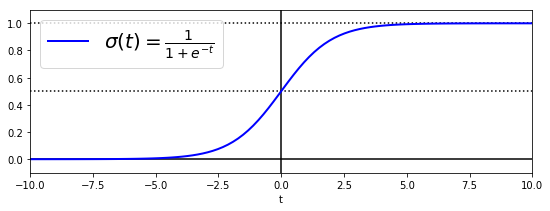

In [114]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# plt.savefig("logistic_function_plot")
plt.show()

# 6.2 Cost Function and Training (成本函數與訓練)

In [115]:
import math 
y = 1
p = 0.8
-y*math.log(p) - (1-y) *math.log( 1 - p)

0.2231435513142097

In [116]:
y = 1
p = 0.9
-y*math.log(p) - (1-y) *math.log( 1 - p)

0.10536051565782628

In [117]:
import numpy as np
np.arange(0.55, 0.96, 0.1)

array([0.55, 0.65, 0.75, 0.85, 0.95])

In [118]:
np.vstack((np.arange(0.55, 0.96, 0.1),-y* np.log(np.arange(0.55, 0.96, 0.1)) - (1-y) * np.log( 1 - np.arange(0.55, 0.96, 0.1))))

array([[0.55      , 0.65      , 0.75      , 0.85      , 0.95      ],
       [0.597837  , 0.43078292, 0.28768207, 0.16251893, 0.05129329]])

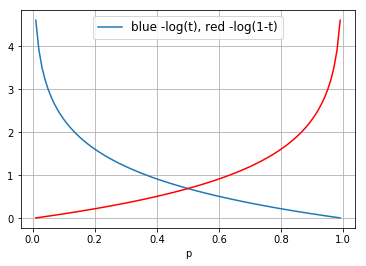

In [119]:
t = np.linspace(0.01, 0.99, 100)
positive_case = - np.log(t)
negative_case = - np.log(1 - t)
plt.plot(t, positive_case, 
         label="blue -log(t), red -log(1-t)")
plt.legend(loc="upper center", fontsize=12)
plt.plot(t, negative_case, "r-")
plt.grid()
plt.xlabel("p")
plt.savefig('data/lec06 log')
plt.show()

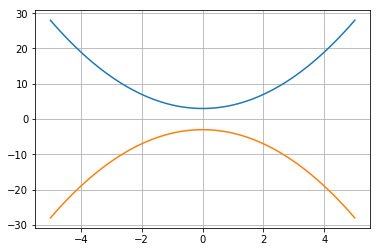

In [120]:
t = np.linspace(-5, 5, 100)
fx = t**2 + 3
inverse_fx = -t**2 - 3
plt.plot(t, fx, t, inverse_fx)
plt.grid()
plt.show()

### Cross Entropy 

example by prof. James F. Allen, http://www.cs.rochester.edu/u/james/CSC248/Lec6.pdf

In [121]:
import numpy as np
p = np.array([0.4, 0.1, 0.25, 0.25])
m1 = np.array([0.25, 0.25, 0.25, 0.25])
m2 = np.array([0.4, 0.1, 0.1, 0.4])

In [122]:
np.log2(m1) 

array([-2., -2., -2., -2.])

In [123]:
np.multiply(-p, np.log2(m1))

array([0.8, 0.2, 0.5, 0.5])

In [124]:
entropy_p = sum(np.multiply(-p, np.log2(p)))
entropy_p

1.860964047443681

In [125]:
sum(np.multiply(-p, np.log2(m2)))

2.021928094887362

In [126]:
sum(np.multiply(-p, np.log2(m1))) # m1 better than m2

2.0

In [127]:
Kullback_Leibler_divergence_m1 = sum(np.multiply(-p, np.log2(m1))) - entropy_p
Kullback_Leibler_divergence_m1

0.13903595255631895

# 4.3 Iris (鳶ㄩㄢ尾花) dataset

In [128]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['feature_names', 'target', 'data', 'DESCR', 'target_names']

In [129]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## class 

* 0=Iris-Setosa, 
* 1=Iris-Versicolor, 
* 2=Iris-Virginica

In [130]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.amin.html#numpy.amin

In [131]:
np.amin(iris.data, axis=0)

array([4.3, 2. , 1. , 0.1])

In [132]:
np.amax(iris.data, axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [133]:
iris.data.shape

(150, 4)

In [134]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [135]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [136]:
import pandas
from sklearn.datasets import load_iris
iris = load_iris()
iris1 = pandas.DataFrame(iris.data, columns=iris.feature_names) 
iris1["class"] =  iris.target
iris1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [137]:
iris1.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


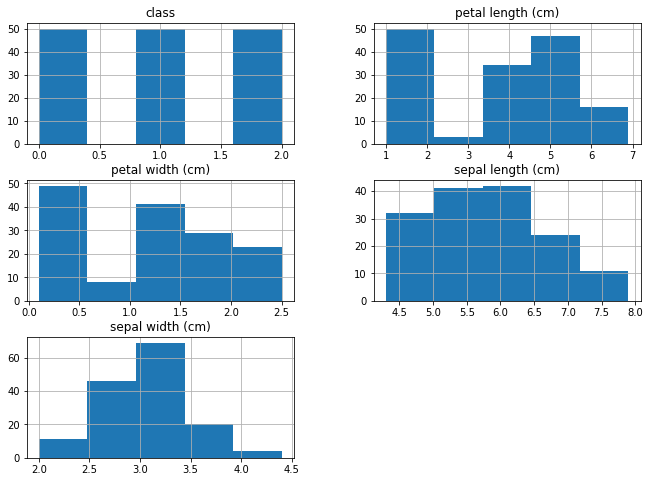

In [138]:
import matplotlib.pyplot as plt
iris1.hist(bins=5, figsize=(11,8))   # variable wine_data
plt.savefig("04_iris_histogram_plots") # 在程式所在資料夾下產生新圖檔
plt.show()

C:\Users\PHD\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F1503A1D0>,
      dtype=object)

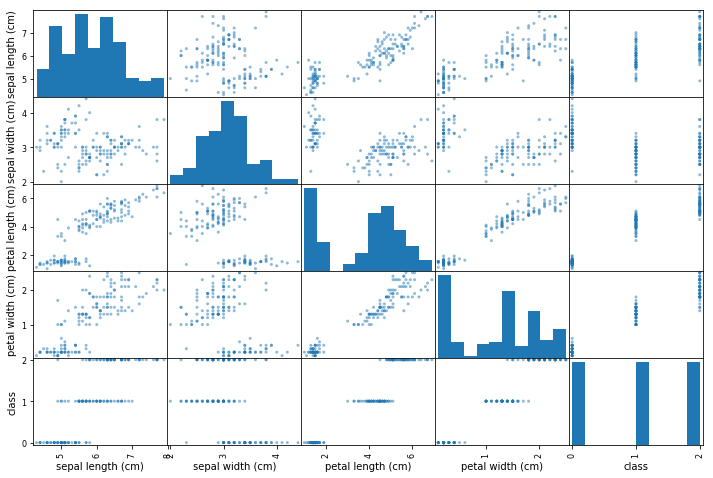

In [139]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris1, figsize=(12,8))

## Use one feature (花瓣寬度) to classify

* https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.astype.html

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [141]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

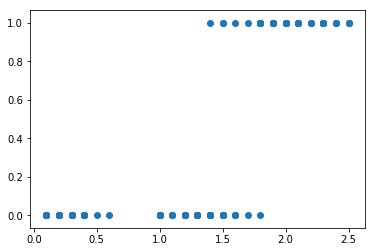

In [142]:
X = iris["data"][:, 3:]  # petal width (花瓣寬度)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
plt.scatter(X,y)
plt.show()

In [143]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

In [145]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
print('Logistic regression training score: %.3f' % log_reg.score(X_train, Y_train))
print('Logistic regression testing score: %.3f' % log_reg.score(X_test, Y_test))

Logistic regression training score: 0.950
Logistic regression testing score: 1.000


In [146]:
from sklearn.metrics import accuracy_score, zero_one_loss, jaccard_similarity_score, confusion_matrix, \
    precision_score, recall_score, fbeta_score 

In [147]:
accuracy_score(Y_test, log_reg.predict(X_test))

1.0

In [148]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [149]:
Y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [150]:
compare = Y_test - log_reg.predict(X_test)
compare = np.abs(compare)
compare

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [151]:
(Y_test.shape[0]  - compare.sum()) / Y_test.shape[0] 

1.0

In [152]:
correct = 0
for i in range(Y_test.shape[0]):
    if log_reg.predict(X_test)[i] == Y_test[i]:
        correct += 1
correct/Y_test.shape[0] 

1.0

## prediction by formula

$$ \frac{exp(\theta_0 + \theta_1 x)}{1+ exp(\theta_0 + \theta_1 x)} $$

In [153]:
log_reg.coef_[0][0], log_reg.intercept_[0]

(2.357284430895153, -3.7866700423030064)

In [154]:
log_reg.decision_function(X_test[1].reshape(1,-1))

array([1.87081259])

In [155]:
log_reg.coef_[0][0]*X_test[1] + log_reg.intercept_[0]

array([1.87081259])

In [156]:
import math
math.exp(2)

7.38905609893065

Input and Output

* https://docs.python.org/3.6/tutorial/inputoutput.html

In [157]:
import math
for i in range(Y_test.shape[0]):
    a = math.exp(log_reg.intercept_[0] + log_reg.coef_[0][0] * X_test[i])
    print('x: {0}, Decision function: {1}, predicted probability: {2},  real class" {3}'\
          .format(X_test[i][0], log_reg.coef_[0][0]*X_test[i] + log_reg.intercept_[0], a/(1+a), Y_test[i]))

x: 2.1, Decision function: [1.16362726], predicted probability: 0.7619911824608187,  real class" 1
x: 2.4, Decision function: [1.87081259], predicted probability: 0.8665522731176059,  real class" 1
x: 0.6, Decision function: [-2.37229938], predicted probability: 0.08530954315141552,  real class" 0
x: 1.2, Decision function: [-0.95792873], predicted probability: 0.277293090186511,  real class" 0
x: 2.3, Decision function: [1.63508415], predicted probability: 0.8368649263433316,  real class" 1
x: 2.3, Decision function: [1.63508415], predicted probability: 0.8368649263433316,  real class" 1
x: 0.3, Decision function: [-3.07948471], predicted probability: 0.04396146722967975,  real class" 0
x: 1.0, Decision function: [-1.42938561], predicted probability: 0.1931944311426617,  real class" 0
x: 1.6, Decision function: [-0.01501495], predicted probability: 0.49624633230370413,  real class" 0
x: 1.8, Decision function: [0.45644193], predicted probability: 0.6121697651631411,  real class" 1
x: 

In [158]:
import math
for i in range(Y_train.shape[0]):
    a = math.exp(log_reg.intercept_[0] + log_reg.coef_[0][0] * X_train[i])
    print('x: ', X_train[i][0], \
          'Decision function: ', log_reg.coef_[0][0]*X_train[i] + log_reg.intercept_[0], \
          'pred ', a/(1+a),\
          'real ', Y_train[i])

x:  2.0 Decision function:  [0.92789882] pred  0.7166488071536519 real  1
x:  2.3 Decision function:  [1.63508415] pred  0.8368649263433316 real  1
x:  0.2 Decision function:  [-3.31521316] pred  0.03505296007375584 real  0
x:  1.7 Decision function:  [0.22071349] pred  0.5549554597505942 real  0
x:  2.0 Decision function:  [0.92789882] pred  0.7166488071536519 real  1
x:  1.8 Decision function:  [0.45644193] pred  0.6121697651631411 real  1
x:  2.5 Decision function:  [2.10654103] pred  0.8915373090881095 real  1
x:  1.6 Decision function:  [-0.01501495] pred  0.49624633230370413 real  0
x:  1.3 Decision function:  [-0.72220028] pred  0.3269086499417752 real  0
x:  0.2 Decision function:  [-3.31521316] pred  0.03505296007375584 real  0
x:  1.8 Decision function:  [0.45644193] pred  0.6121697651631411 real  1
x:  2.1 Decision function:  [1.16362726] pred  0.7619911824608187 real  1
x:  0.2 Decision function:  [-3.31521316] pred  0.03505296007375584 real  0
x:  1.3 Decision function:  [

In [159]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

* a small example

In [160]:
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
y_pred = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [2, 3]], dtype=int64)

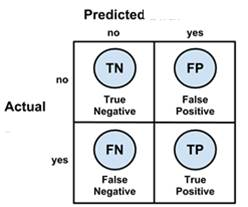

In [161]:
from IPython.display import Image
Image(filename='data/04_confusion.jpg')

In [162]:
cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
cm[::-1, ::-1]

array([[11,  0],
       [ 0, 19]], dtype=int64)

In [163]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, log_reg.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30



In [164]:
classification_report(Y_test, log_reg.predict(X_test)) # as string

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        19\n          1       1.00      1.00      1.00        11\n\navg / total       1.00      1.00      1.00        30\n'

In [165]:
Y_test.sum() # total number of class 1 (Iris-Virginica)

11

In [166]:
precision_score(Y_test, log_reg.predict(X_test)), recall_score(Y_test, log_reg.predict(X_test))

(1.0, 1.0)

## another data set

In [167]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width (花瓣寬度)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))

[[13  0]
 [ 0 17]]
Logistic regression score: 1.000


In [168]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width (花瓣寬度)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))


Logistic regression score: 0.967


#### Graphical explanation

* https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
* One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

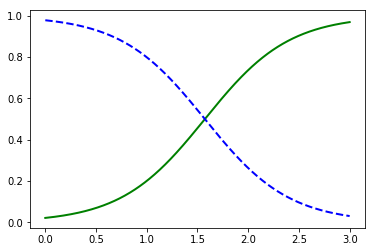

In [169]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

The figure in the book actually is actually a bit fancier: 

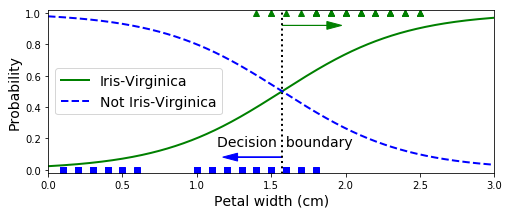

In [170]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.savefig("logistic_regression_plot")
plt.show()

In [171]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.9778833 , 0.0221167 ],
       [0.97772629, 0.02227371],
       [0.97756819, 0.02243181],
       ...,
       [0.03156033, 0.96843967],
       [0.03133996, 0.96866004],
       [0.03112108, 0.96887892]])

In [172]:
y_proba.shape

(1000, 2)

In [68]:
decision_boundary

array([1.57057057])

以 1.61561562 當基準 , > 1.61561562 為 1

In [69]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# 4.3.2 Precision/Recall Tradeoff (取捨)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

X = iris["data"][:, 3:]  # petal width (花瓣寬度)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train) 
Y_scores = log_reg.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores)
precisions, recalls, thresholds 

(array([0.68421053, 0.76      , 0.9       , 0.94594595, 0.97142857,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([1.        , 0.97435897, 0.92307692, 0.8974359 , 0.87179487,
        0.64102564, 0.51282051, 0.41025641, 0.28205128, 0.25641026,
        0.15384615, 0.07692308, 0.        ]),
 array([-0.49943374, -0.26392519, -0.02841664,  0.20709191,  0.44260047,
         0.67810902,  0.91361757,  1.14912612,  1.38463467,  1.62014322,
         1.85565177,  2.09116032]))

In [71]:
thresholds.min(), thresholds.max()

(-0.49943373781713873, 2.091160321462598)

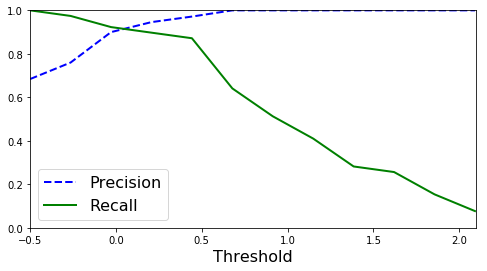

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 2.1])
plt.savefig("data/06_precision_recall_vs_threshold_plot")
plt.show()

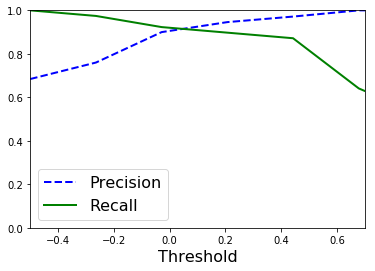

In [73]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1])


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 0.7])
plt.savefig("04_precision_recall_vs_threshold_plot")
plt.show()

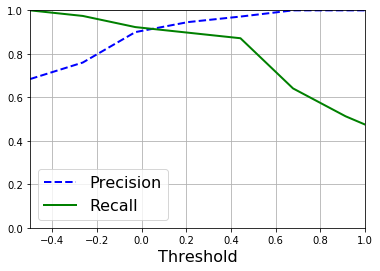

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.grid()
    plt.ylim([0, 1])

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-0.5, 1])
plt.savefig("04_precision_recall_vs_threshold_plot")
plt.show()

# 4.3.3 ROC curve

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X = iris["data"][:, 3:]  # petal width (花瓣寬度)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=22)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))
Y_scores = log_reg.decision_function(X_train)

Logistic regression score: 0.933


In [76]:
# Compute ROC curve
Y_score = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
fpr.shape, tpr.shape, thresholds.shape

((13,), (13,), (13,))

In [77]:
# Compute ROC curve
Y_score = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

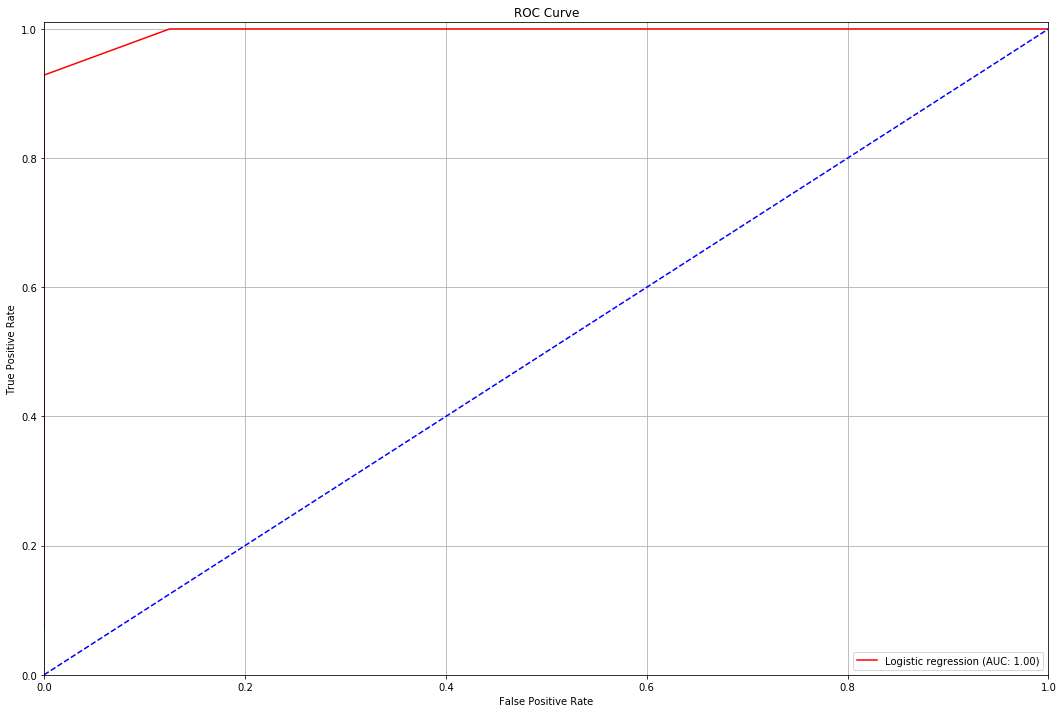

In [78]:
plt.figure(figsize=(18, 12))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("04_ROC_plot")
plt.grid()
plt.show()

In [79]:
auc(fpr, tpr)

0.9955357142857143

## 6.3.5 Python with 2 features 

* 2 features: petal width (花瓣寬度) and length (長度)

[[ 9  1]
 [ 0 20]]
Logistic regression score: 0.967


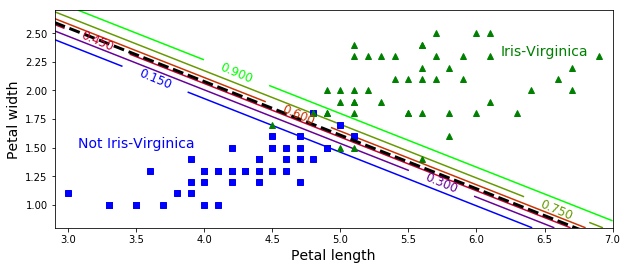

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris["data"][:, (2, 3)]  # petal width (花瓣寬度) and length (長度)
y = (iris["target"] == 2).astype(np.int)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X_train, Y_train)

cm = confusion_matrix(y_true=Y_test, y_pred= log_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % log_reg.score(X_test, Y_test))
 

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

In [81]:
X.shape

(150, 2)

## 6.4 Softmax Regression

In [82]:
import numpy as np
import math 
s = np.array([0, 1, 2])
np.exp(s)/np.exp(s).sum()

array([0.09003057, 0.24472847, 0.66524096])

Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead. 

You must also specify a solver that supports
Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris["data"][:, (2, 3)]  # petal width (花瓣寬度) and length (長度)
y = iris["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

C:\Users\PHD\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


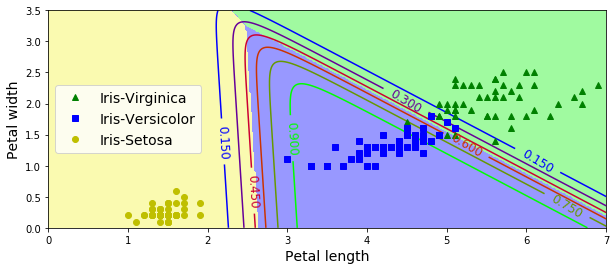

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig("data/lec06 softmax_regression_contour_plot")
plt.show()

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask
your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2)
with 94.2% probability (or Iris-Versicolor with 5.8% probability):

In [85]:
softmax_reg.predict([[5, 2]])

array([2])

In [86]:
softmax_reg.predict_proba([[5, 2]])

array([[9.48936932e-07, 6.91779715e-02, 9.30821080e-01]])

In [87]:
np.vstack((softmax_reg.predict(X_test), Y_test))

array([[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0],
       [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]])

In [88]:
cm = confusion_matrix(y_true = Y_test, y_pred = softmax_reg.predict(X_test))
print(cm[::-1, ::-1])
print('Logistic regression score: %.3f' % softmax_reg.score(X_test, Y_test))

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Logistic regression score: 1.000


In [89]:
import pandas as pd
pd.crosstab(Y_test, softmax_reg.predict(X_test),
            rownames=['label'], colnames=['predict'])

predict,0,1,2
label,,,
0,10,0,0
1,0,9,0
2,0,0,11


# another random state

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = iris["data"][:, (2, 3)]  # petal width (花瓣寬度) and length (長度)
y = iris["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 46)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state = 46)
softmax_reg.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % softmax_reg.score(X_test, Y_test))
pd.crosstab(Y_test, softmax_reg.predict(X_test),
            rownames=['label'], colnames=['predict'])

Logistic regression score: 0.867


predict,0,1,2
label,,,
0,12,0,0
1,0,7,2
2,0,2,7


## cross-validation (交叉驗證)

In [91]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='accuracy', cv = 10)
scores

array([0.8       , 0.86666667, 0.86666667, 0.8       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 1.        , 1.        ])

In [92]:
scores.mean()

0.86

# 6.4.3 Grid Search 

In [93]:
import numpy as np
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score 

multiprocessing.cpu_count()

8

In [94]:
import time
startTime = time.time() 

X = iris["data"] 
y = iris["target"]
# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2, 1, 5, 10, 15, 20, 100]  
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, scoring ='accuracy', cv = 10)
   
gs.fit(X, y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

endTime = time.time() # 結束
print('%s seconds to calculate.' % (endTime - startTime))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best estimator CV average score: 0.980
0.9325289726257324 seconds to calculate.


# info

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [95]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(penalty= 'l1') # C : float, default: 1.0
scores = cross_val_score(lr, X, y, scoring='accuracy', cv = 10)
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 1.        , 1.        , 1.        ])

In [96]:
scores.mean()

0.9600000000000002

In [97]:
lr = LogisticRegression(penalty= 'l1', C = 10)
cross_val_score(lr, X, y, scoring='accuracy', cv = 10)

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [98]:
lr = LogisticRegression(penalty= 'l1', C = 10)
cross_val_score(lr, X, y, scoring='accuracy', cv = 10).mean()

0.9800000000000001

# Skip the remaining

# logistic regression significant python

* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [99]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

ValueError: endog must be in the unit interval.

In [ ]:
X

In [ ]:
np.amin(X, axis= 0) 

In [ ]:
np.amax(X, axis= 0) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
X_new = ss.fit_transform(X)

In [ ]:
np.amin(X_new, axis= 0) 

In [ ]:
np.amax(X_new, axis= 0) 

In [ ]:
y

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X_new)
result = logit_model.fit()
print(result.summary2())